In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
#import matplotlib.dates as mdates
import datetime as dt
import numpy as np
plt.style.use('seaborn-whitegrid')
import pandas as pd
import seaborn as sns
instapouf = pd.read_csv("instapouf.csv", sep=",")
print(instapouf)

         date  abo
0  2021-05-17  245
1  2021-05-24  324
2  2021-05-31  382
3  2021-06-04  400
4  2021-06-23  500
5  2021-07-03  530
6  2021-07-07  560
7  2021-07-08  570
8  2021-07-13  580
9  2021-07-19  600


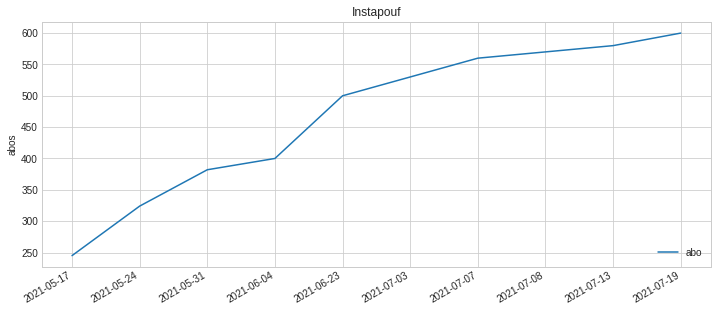

In [75]:
# extract dates
dates = instapouf['date']
dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]

fig, ax = plt.subplots(figsize=(12,5))
plt.title("Instapouf")

#ax.plot('date', 'abo', data=instapouf)
ax.plot('abo', data=instapouf)

# set the number of ticks on x-axis to be a list [0, ... ,R]
# R is the number of rows in the data (i.e. len(dates))
# this ensures ticklabels align with the corresponding data point
ax.set_xticks(np.arange(len(dates)))
ax.set_xticklabels(dates)     # set the ticklabels to the list of datetimes
ax.legend(loc=4, fontsize=10) # make a legend and place in bottom-right (loc=4)
#plt.xticks(rotation=30)       # rotate the xticklabels by 30 deg
ax = ax.set(ylabel='abos')

fig.autofmt_xdate()

#plt.plot(instapouf['date'], instapouf['abo'])
plt.show()

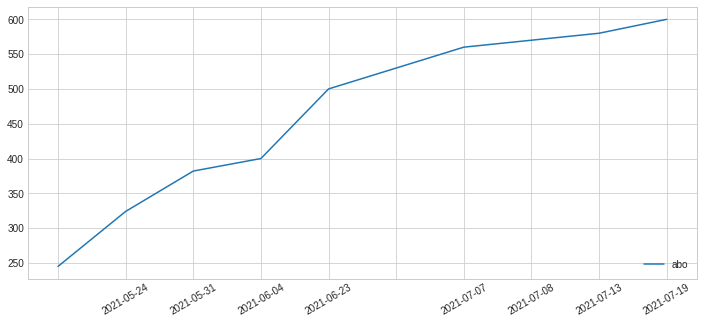

In [74]:
spacing = 5
fig, ax = plt.subplots(figsize=(12,5))
ax.plot('abo', data=instapouf)
ax.set_xticks(np.arange(len(dates)))
ax.set_xticklabels(dates)
ax.legend(loc=4, fontsize=10)
plt.xticks(rotation=30)
# for each label in the list of xticklabels 
# (we skip every n'th label in this list using [::n]):
# set to not visible
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)
plt.show()